In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = load_breast_cancer()

rng = np.random.RandomState(47)
noise = rng.normal(size=(len(c.data), 50))
X_w_noise = np.hstack([c.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, c.target, random_state=0, test_size=.5)

selectPerc = SelectPercentile(percentile=50)
selectPerc.fit(X_train, y_train)
X_train_selected = selectPerc.transform(X_train)

print('Форма массива X_train: {}'.format(X_train.shape))
print('Форма массива X_train_selected: {}'.format(X_train_selected.shape))

Форма массива X_train: (284, 80)
Форма массива X_train_selected: (284, 40)


Text(0.5, 0, 'Индекс примера')

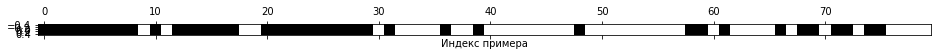

In [4]:
mask = selectPerc.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [5]:
from sklearn.linear_model import LogisticRegression

In [10]:
X_test_selected = selectPerc.transform(X_test)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print('Правильность со всеми признаками: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Правильность только с отобранными признаками: {:.3f}'.format(
    lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.912
Правильность только с отобранными признаками: 0.940


C:\Program Files (x86)\Python3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files (x86)\Python3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi